In [100]:
import pandas as pd
import numpy as np
from datetime import timedelta, time, datetime
from matplotlib import pyplot as plt

In [101]:
ONE_DAY = int(24 * 60 / 5)
ONE_HOUR = int(60 / 12)
CONSECUTIVE_DIF = 0.5
COEFFICIENT = 0.0084
MIN_METER = 0
MAX_METER = 500

In [102]:
class OutlierDetection():
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.titles = list(self.data.keys())
        self.date = self.titles[0]
        self.meter_52 = self.titles[1]
        self.meter_51 = self.titles[2]
        self.meter_sum = self.titles[3]
        
    def plot(self):
        x = self.data[self.date]
        y = self.data[self.meter_sum]
        plt.plot(x, y)
        plt.xlabel(self.date)
        plt.ylabel(self.meter_sum)
        plt.figure()
    
        
    def inRange(self, number):
         return number > MIN_METER and number < MAX_METER
        
        
    def checkMeters(self):
        meter_51 = list(self.data[self.meter_51])
        meter_52 = list(self.data[self.meter_52])
        
        for i in range(ONE_DAY, len(meter_sum)):
            if not self.inRange(meter_51[i]):
                meter_51[i] = meter_51[i - ONE_DAY]
                
            if not self.inRange(meter_52[i]):
                meter_52[i] = meter_52[i - ONE_DAY]
                    
        for i in range(ONE_DAY):
            if not self.inRange(meter_51[i]):
                meter_51[i] = self.data[self.meter_51].mean()
            
            if not self.inRange(meter_52[i]):
                meter_52[i] = self.data[self.meter_52].mean()
                
        self.data[self.meter_51] = meter_51
        self.data[self.meter_52] = meter_52
                    
    def calculateSum(self):
        self.data[self.meter_sum] = COEFFICIENT * (self.data[self.meter_51] + self.data[self.meter_52])
        
    def checkMeterSum(self):
        meter_sum = list(self.data[self.meter_sum])
        for i in range(1, len(meter_sum)):
                
            if (meter_sum[i] - meter_sum[i - 1]) > CONSECUTIVE_DIF:
                meter_sum[i] = meter_sum[i - 1] + CONSECUTIVE_DIF
            if (meter_sum[i - 1] - meter_sum[i]) > CONSECUTIVE_DIF:
                meter_sum[i] = meter_sum[i - 1] - CONSECUTIVE_DIF

        self.data[self.meter_sum] = meter_sum
            
        
    def findMissing(self):
        meter_sum = list(self.data[self.meter_sum])
        same = 1
        missing = [0]
        for i in range(1, len(meter_sum)):
            if meter_sum[i] == meter_sum[i - 1]:
                same += 1
            else:
                if same >= ONE_HOUR:
                    missing.append(i)
                else:
                    missing.pop()
                    
                same = 1
                missing.append(i)
        
        if same >= ONE_HOUR:
            missing.append(len(meter_sum))
        else:
            missing.pop()
        
        return missing

    def fillMissing(self, missing):
        meter_51 = list(self.data[self.meter_51])
        meter_52 = list(self.data[self.meter_52])
        for i in range(0, len(missing), 2):
            for j in range(missing[i], missing[i + 1]):
                if j - ONE_DAY < 0:
                    meter_51[j] = meter_51[j + ONE_DAY]
                    meter_52[j] = meter_52[j + ONE_DAY]
                else:
                    meter_51[j] = meter_51[j - ONE_DAY]
                    meter_52[j] = meter_52[j - ONE_DAY]

        self.data[self.meter_51] = meter_51
        self.data[self.meter_52] = meter_52

In [105]:
class Problem():
    def __init__(self, filename):
        self.outlier = OutlierDetection(filename)
        
    def solve(self):
        self.outlier.checkMeters()
        self.outlier.calculateSum()
        self.outlier.checkMeterSum()
        missing = self.outlier.findMissing()
        self.outlier.fillMissing(missing)
        self.outlier.checkMeterSum()
        
    def plot(self):
        self.outlier.plot()

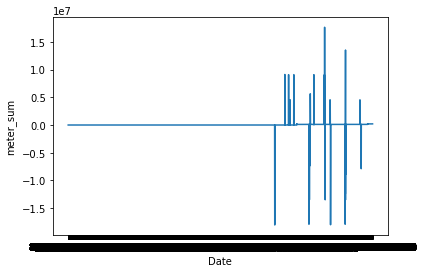

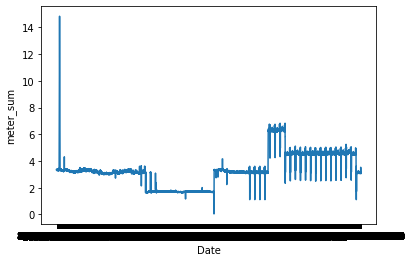

<Figure size 432x288 with 0 Axes>

In [106]:
problem = Problem('data1.csv')
problem.plot()
problem.solve()
problem.plot()